# Data generation

In [1]:
# Load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# HELP: Numpy random number generator functions

# 1. Draw samples from a uniform distribution
np.random.uniform?

# 2. Draw random samples from a multivariate normal distribution
np.random.multivariate_normal?

## Experimentation with Distributions

In [27]:
# Generate data
nb_of_points_sample = 1000
dim_sample = 2

### Uniform

In [4]:
## ---- Uniform distribution -----
df = pd.DataFrame()

for i in range(dim_sample):
    print(f"Create {i} dimension")
    x = np.random.uniform(low=-1, high=1, size=1000)
    df = pd.concat([df, pd.Series(x, name="X"+str(i))], axis=1)

Create 0 dimension
Create 1 dimension


In [5]:
# Check dataset
print("Data Dimension:", df.shape)
print("")
print(f"Correlation of df is \n{df.corr()}")
print("")
df.head()

Data Dimension: (1000, 2)

Correlation of df is 
          X0        X1
X0  1.000000 -0.002323
X1 -0.002323  1.000000



,X0,X1
0,-0.425632,0.811724
1,0.319450,0.872745
2,0.523569,-0.721257
3,0.466533,-0.251507
4,0.618639,-0.034896


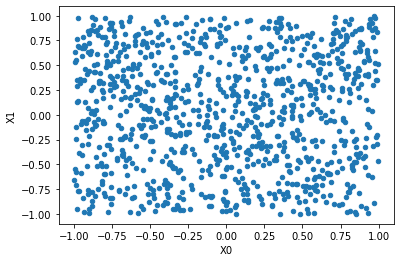

In [6]:
# Plot 2 dimensions
df.plot.scatter(x="X0", y="X1");

### Normal

In [30]:
## ----  Normal distribution -----
mean_sample = [0, 0]
cov_sample = [[1, 0], [0, 1]] 

x = np.random.multivariate_normal(mean = mean_sample, cov = cov_sample, size=[1000, int(dim_sample/2)])
df = pd.DataFrame(data = x.reshape(1000,dim_sample))

df.columns = ["X"+str(l) for l in list(df.columns)]

In [31]:
# Check dataset
print("Data Dimension:", df.shape)
print("")
print(f"Correlation of df is \n{df.corr()}")
print("")
df.head()

Data Dimension: (1000, 2)

Correlation of df is 
        X0      X1
X0  1.0000  0.0743
X1  0.0743  1.0000



,X0,X1
0,-1.221816,0.019652
1,1.209884,0.926557
2,0.281654,-0.244587
3,-0.653585,-0.737510
4,-1.208354,-0.745497


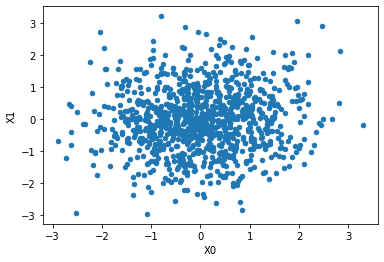

In [32]:
# Plot 2 dimensions
df.plot.scatter(x="X0", y="X1");

### Correlated

In [34]:
## ----  Correlated distribution -----
mean_sample = [0, 0]
cov_sample = [[1, 0.8], [0.8, 1]] 

# Create correlated dim_sample d-space points

x = np.random.multivariate_normal(mean = mean_sample, cov = cov_sample, size=[1000, int(dim_sample/2)])
df = pd.DataFrame(data = x.reshape(1000,dim_sample))

df.columns = ["X"+str(l) for l in list(df.columns)]

In [35]:
# Check dataset
print("Data Dimension:", df.shape)
print("")
print(f"Correlation of df is \n{df.corr()}")
print("")
df.head()

Data Dimension: (1000, 2)

Correlation of df is 
          X0        X1
X0  1.000000  0.791979
X1  0.791979  1.000000



,X0,X1
0,1.028298,0.142916
1,2.217759,1.704023
2,-0.965723,-0.957992
3,1.745410,1.716054
4,-0.311069,-0.058993


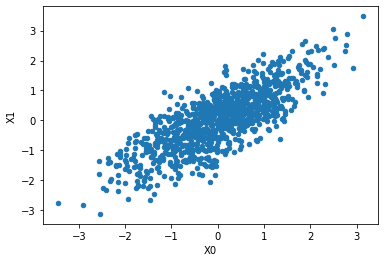

In [36]:
# Plot 2 dimensions
df.plot.scatter(x="X0", y="X1");

### Anti-correlated distribution

In [37]:
## ----  Anticorrelated distribution -----
mean_sample = [0, 0]
cov_sample = [[1, -0.8], [-0.8, 1]] 

# Create correlated dim_sample d-space points

x = np.random.multivariate_normal(mean = mean_sample, cov = cov_sample, size=[1000, int(dim_sample/2)])
df = pd.DataFrame(data = x.reshape(1000,dim_sample))

df.columns = ["X"+str(l) for l in list(df.columns)]

In [38]:
# Check dataset
print("Data Dimension:", df.shape)
print("")
print(f"Correlation of df is \n{df.corr()}")
print("")
df.head()

Data Dimension: (1000, 2)

Correlation of df is 
          X0        X1
X0  1.000000 -0.804465
X1 -0.804465  1.000000



,X0,X1
0,-1.346620,0.737078
1,2.448980,-3.231810
2,-1.235279,1.163786
3,-0.692113,0.550906
4,0.028415,-0.506720


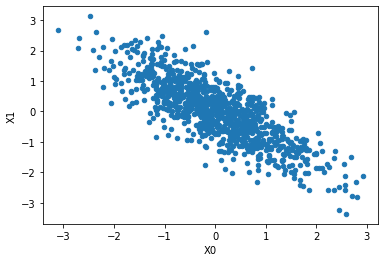

In [39]:
# Plot 2 dimensions
df.plot.scatter(x="X0", y="X1");

## Create datasets

In [41]:
import gc

In [47]:
# Define data generation parameters
nb_of_points = [10000, 100000, 1000000]
dim = [2,4,10,50]
distribution = ["uniform", "normal", "correlated","anticorrelated"]

# Define all possible configurations
configurations = [(i,j,k) for i in nb_of_points for j in dim for k in distribution]

print(f"The number of Total configurations (dataset to be created) is {len(configurations)}")

The number of Total configurations (dataset to be created) is 48


In [46]:
for nb_of_points_sample, dim_sample, distribution_sample in configurations:

    print(f"Generate {nb_of_points_sample} data points, in {dim_sample}-dimensional space, following the {distribution_sample} distribution")
    
    
    df = pd.DataFrame()
    
    
    if distribution_sample == "uniform":
        
        # Create dataset for uniform distribution
        for i in range(dim_sample):
            print(f"Create {i} dimension")
            x = np.random.uniform(low=-1, high=1, size=nb_of_points_sample)
            df = pd.concat([df, pd.Series(x, name="X"+str(i))], axis=1)
         
    else:
        
        if distribution_sample == "normal":
        
            mean_sample = [0, 0]
            cov_sample = [[1, 0], [0, 1]] 
    
    
        elif distribution_sample == "correlated":
        
            mean_sample = [0, 0]
            cov_sample = [[1, 0.8], [0.8, 1]] 
    
    
        elif distribution_sample == "anticorrelated":
    
            mean_sample = [0, 0]
            cov_sample = [[1, -0.8], [-0.8, 1]] 

            
        # Create dataset based on mean and covariance matrix
        x = np.random.multivariate_normal(mean = mean_sample,
                                          cov = cov_sample,
                                          size=[nb_of_points_sample, int(dim_sample/2)])
        
        df = pd.DataFrame(data = x.reshape(nb_of_points_sample,dim_sample))
        df.columns = ["X"+str(l) for l in list(df.columns)]
        
    
    # Save data frame as csv
    path = f"dataset_{nb_of_points_sample}_points_{dim_sample}_dimension_{distribution_sample}_distribution.csv"
    print(f"Save dataset to {path}")
    
    df.to_csv(f"../datasets/{path}")
    
    gc.collect()
    print("_"*100)
    

Generate 10000 data points, in 2-dimensional space, following the uniform distribution
Create 0 dimension
Create 1 dimension
Save dataset to dataset_10000_points_2_dimension_uniform_distribution.csv
____________________________________________________________________________________________________
Generate 10000 data points, in 2-dimensional space, following the normal distribution
Save dataset to dataset_10000_points_2_dimension_normal_distribution.csv
____________________________________________________________________________________________________
Generate 10000 data points, in 2-dimensional space, following the correlated distribution
Save dataset to dataset_10000_points_2_dimension_correlated_distribution.csv
____________________________________________________________________________________________________
Generate 10000 data points, in 2-dimensional space, following the anticorrelated distribution
Save dataset to dataset_10000_points_2_dimension_anticorrelated_distribution.c

____________________________________________________________________________________________________
Generate 100000 data points, in 10-dimensional space, following the correlated distribution
Save dataset to dataset_100000_points_10_dimension_correlated_distribution.csv
____________________________________________________________________________________________________
Generate 100000 data points, in 10-dimensional space, following the anticorrelated distribution
Save dataset to dataset_100000_points_10_dimension_anticorrelated_distribution.csv
____________________________________________________________________________________________________
Generate 100000 data points, in 50-dimensional space, following the uniform distribution
Create 0 dimension
Create 1 dimension
Create 2 dimension
Create 3 dimension
Create 4 dimension
Create 5 dimension
Create 6 dimension
Create 7 dimension
Create 8 dimension
Create 9 dimension
Create 10 dimension
Create 11 dimension
Create 12 dimension
Create 1

____________________________________________________________________________________________________
Generate 10000000 data points, in 2-dimensional space, following the uniform distribution
Create 0 dimension
Create 1 dimension
Save dataset to dataset_10000000_points_2_dimension_uniform_distribution.csv


KeyboardInterrupt: 

## Sanity check for created datasets

In [2]:
import pandas as pd
import gc

**Check created datasets**

In [1]:
%%bash
cd ../datasets
ls

dataset_1000000_points_10_dimension_anticorrelated_distribution.csv
dataset_1000000_points_10_dimension_correlated_distribution.csv
dataset_1000000_points_10_dimension_normal_distribution.csv
dataset_1000000_points_10_dimension_uniform_distribution.csv
dataset_1000000_points_2_dimension_anticorrelated_distribution.csv
dataset_1000000_points_2_dimension_correlated_distribution.csv
dataset_1000000_points_2_dimension_normal_distribution.csv
dataset_1000000_points_2_dimension_uniform_distribution.csv
dataset_1000000_points_4_dimension_anticorrelated_distribution.csv
dataset_1000000_points_4_dimension_correlated_distribution.csv
dataset_1000000_points_4_dimension_normal_distribution.csv
dataset_1000000_points_4_dimension_uniform_distribution.csv
dataset_1000000_points_50_dimension_anticorrelated_distribution.csv
dataset_1000000_points_50_dimension_correlated_distribution.csv
dataset_1000000_points_50_dimension_normal_distribution.csv
dataset_1000000_points_50_dimension_uniform_distribution.

In [13]:
# Load a sample dataset

# nb_of_points = [10000, 100000, 1000000]
# dim = [2,4,10,50]
# distribution = ["uniform", "normal", "correlated","anticorrelated"]

nb_of_points_sample = 100000
dim_sample = 10
distribution_sample = "anticorrelated"

path = f"dataset_{nb_of_points_sample}_points_{dim_sample}_dimension_{distribution_sample}_distribution.csv"

df = pd.read_csv(f"../datasets/{path}", index_col=0)
    

In [14]:
# Check dataset
print("Data Dimension:", df.shape)

Data Dimension: (100000, 10)


In [15]:
# Check head
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-1.512443,1.704484,1.072766,-0.551516,-0.482011,1.097130,-0.729336,-0.331284,0.709406,0.425278
1,0.253150,-1.556948,-0.581680,0.225404,-0.814736,1.620514,-0.121246,0.564242,0.924498,0.310244
2,0.029391,-0.720863,0.621701,0.288068,1.439878,-1.955270,0.141329,-0.575287,1.636173,-1.668184
3,-0.061454,-0.312797,-1.613206,2.448921,-1.738932,1.133143,1.550519,-1.307613,1.243547,-0.532512
4,-0.016603,0.251878,0.970169,-0.606832,0.136513,-0.536520,0.624490,-1.135312,-1.443630,1.953995


In [16]:
# Check correlations
print("Correlation matrix")
df.corr().style.background_gradient()


Correlation matrix


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
X0,1.000000,-0.800290,0.004516,-0.000304,0.006526,-0.003080,0.003425,-0.001159,0.003934,-0.002609
X1,-0.800290,1.000000,-0.002765,-0.000272,-0.008699,0.003604,-0.007606,0.004649,-0.001727,-0.000108
X2,0.004516,-0.002765,1.000000,-0.799365,0.002169,-0.000855,0.000860,-0.002446,-0.002026,0.002699
X3,-0.000304,-0.000272,-0.799365,1.000000,-0.001350,0.000328,-0.001812,0.001569,0.000103,-0.003303
X4,0.006526,-0.008699,0.002169,-0.001350,1.000000,-0.800633,0.002520,-0.003338,0.001445,-0.002204
X5,-0.003080,0.003604,-0.000855,0.000328,-0.800633,1.000000,-0.003460,0.002865,-0.000860,0.003314
X6,0.003425,-0.007606,0.000860,-0.001812,0.002520,-0.003460,1.000000,-0.799315,0.001183,-0.000559
X7,-0.001159,0.004649,-0.002446,0.001569,-0.003338,0.002865,-0.799315,1.000000,-0.001742,0.000739
X8,0.003934,-0.001727,-0.002026,0.000103,0.001445,-0.000860,0.001183,-0.001742,1.000000,-0.800356
X9,-0.002609,-0.000108,0.002699,-0.003303,-0.002204,0.003314,-0.000559,0.000739,-0.800356,1.000000


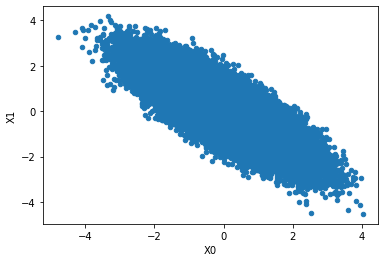

In [17]:
# Plot 2 dimensions
df.plot.scatter(x="X0", y="X1");